Model Report
Accuracy : 0.7865
AUC Score (Train): 0.859550
CV Score : Mean:0.8295726 | Std:0.04313234 | Min:0.7281481 | Max:0.8903704


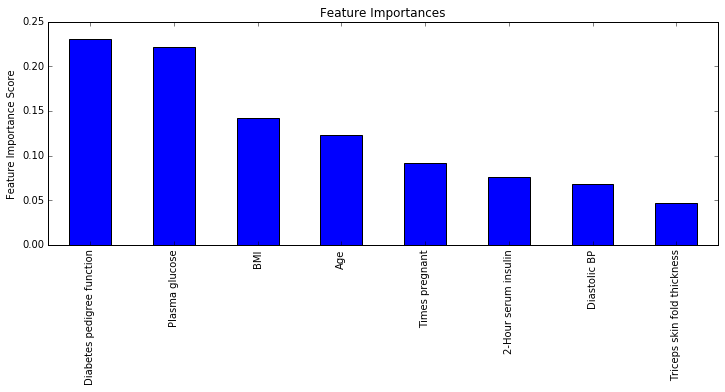

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn import cross_validation, metrics   
from sklearn.cross_validation import train_test_split

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
features = ["Times pregnant", "Plasma glucose", "Diastolic BP", "Triceps skin fold thickness", "2-Hour serum insulin", "BMI", "Diabetes pedigree function", "Age"]

# load data
dataset = pd.read_csv(url, header = None)
dataset.head()

dataset = dataset.values
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


model = GradientBoostingClassifier()

model.fit(X_train, y_train)
        
y_predicted = model.predict(X_test)
y_predprob = model.predict_proba(X_test)[:,1]
    

cv_score = cross_validation.cross_val_score(model, X, y,cv=10, scoring="roc_auc")
    

print("Model Report")
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_predicted))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))
print("CV Score : Mean:%.7g | Std:%.7g | Min:%.7g | Max:%.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

feat_imp = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')



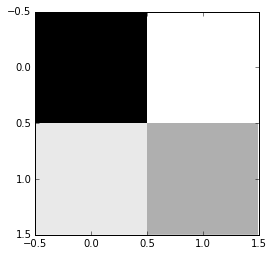

In [8]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_predicted)
plt.imshow(c_matrix, cmap='binary', interpolation='None')
plt.show()

#TODO: Get actual numbers to show on the matrix